::::{grid}
:gutter: 3

:::{grid-item-card}

```{image} ../../img/logoIGE_Color_Light.jpg
:alt: logo_ige
:class: bg-primary mb-1
:width: 50%
:align: center
```

:::

:::{grid-item}

:::

:::{grid-item-card}

```{image} ../../img/logo_UGA_imag.png
:alt: logo_uga
:class: bg-primary mb-1
:width: 90%
:align: center
```

:::

::::

<style type="text/css">
    table td{
    border:none;
    }
</style>

<table>
    <tr>
        <td>
            <center>
                <h1>Machine Learning to predict location of ice recrystallization</h1> <br>
                <hr>
                May - July 2022 <br>
                UGA and IGE internship <br>
                M1 Statistics and Data Sciences (SSD) <br> <br>
                Renan MANCEAUX <br>
                Supervisor : Thomas CHAUVE <br>
                <h1> Data Computing </h1>
            </center>
        </td>
    </tr>
</table>

-----------------------------------

(ax:anisotropy)=

# Compute and save anisotropy factors

Using **xarrayaita**

Read the [documentation](https://mecaiceige.gricad-pages.univ-grenoble-alpes.fr/tools/lib_python/xarray_aita/)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
sys.path.append("../../scripts/")
import utils

import xarray as xr
import xarrayaita.aita as xa
import pickle

## Load data 

In [12]:
CI02 = utils.load_data("../../data/for_learning/CI02.npy")
CI04 = utils.load_data("../../data/for_learning/CI04.npy")
CI06 = utils.load_data("../../data/for_learning/CI06.npy")
CI09 = utils.load_data("../../data/for_learning/CI09.npy")
CI21 = utils.load_data("../../data/for_learning/CI21.npy")

In [13]:
ds_CI02 = pickle.load(open('../../data/craft/CI02.xr', 'rb'))
ds_CI04 = pickle.load(open('../../data/craft/CI04.xr', 'rb'))
ds_CI06 = pickle.load(open('../../data/craft/CI06.xr', 'rb'))
ds_CI09 = pickle.load(open('../../data/craft/CI09.xr', 'rb'))
ds_CI21 = pickle.load(open('../../data/craft/CI21.xr', 'rb'))

In [14]:
s2 = (np.shape(ds_CI02.orientation)[0],np.shape(ds_CI02.orientation)[1])
s4 = (np.shape(ds_CI04.orientation)[0],np.shape(ds_CI04.orientation)[1])
s6 = (np.shape(ds_CI06.orientation)[0],np.shape(ds_CI06.orientation)[1])
s9 = (np.shape(ds_CI09.orientation)[0],np.shape(ds_CI09.orientation)[1])
s21 = (np.shape(ds_CI21.orientation)[0],np.shape(ds_CI21.orientation)[1])

In [15]:
CI02 = utils.conver2xr(CI02,s2,'CI02')
CI04 = utils.conver2xr(CI04,s4,'CI04')
CI06 = utils.conver2xr(CI06,s6,'CI06')
CI09 = utils.conver2xr(CI09,s9,'CI09')
CI21 = utils.conver2xr(CI21,s21,'CI21')

---------------------------
## CI02

In [16]:
dist2TJ = ds_CI02.aita.dist2TJ_labels()
an_factor = ds_CI02.aita.anisotropy_factors()

ds_CI02['an_fact'] = ds_CI02.aita.anisotropy_factors()

CI02['dist2TJ'] = dist2TJ
CI02['relativ_an'] = an_factor[:,:,0]
CI02['fractional_an'] = an_factor[:,:,1]
CI02['volratio_an'] = an_factor[:,:,2]
CI02['flatness_an'] = an_factor[:,:,3]

In [17]:
CI02

<xarray.Dataset>
Dimensions:        (y: 533, x: 480)
Dimensions without coordinates: y, x
Data variables: (12/15)
    Y              (y, x) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    dist2GB        (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    dist2TJ        (y, x) float64 29.3 28.89 28.5 28.15 ... 18.83 19.81 20.8
    schmid         (y, x) float64 0.3953 0.3953 0.3953 ... 0.4323 0.4323 0.4323
    diff_schmid    (y, x) float64 0.104 0.104 0.104 ... 0.03326 0.03326 0.03326
    misangle       (y, x) float64 0.391 0.391 0.391 ... 0.2521 0.2521 0.2521
    ...             ...
    act_py         (y, x) float64 1.011e-06 1.238e-06 ... 2.845e-10 7.408e-11
    work           (y, x) float64 0.00395 0.003692 ... 0.0008936 0.001206
    relativ_an     (y, x) float64 1.24 1.24 1.24 1.24 ... 1.328 1.328 1.328
    fractional_an  (y, x) float64 0.7785 0.7785 0.7785 ... 0.7988 0.7988 0.7988
    volratio_an    (y, x) float64 0.9954 0.9954 0.9954 ... 0.9921 0.9921 0.9921
    flatness_an    (y, x) float64 0.02774 0.02774 0.02774 ... 0.3177 0.3177
Attributes:
    name:     CI02

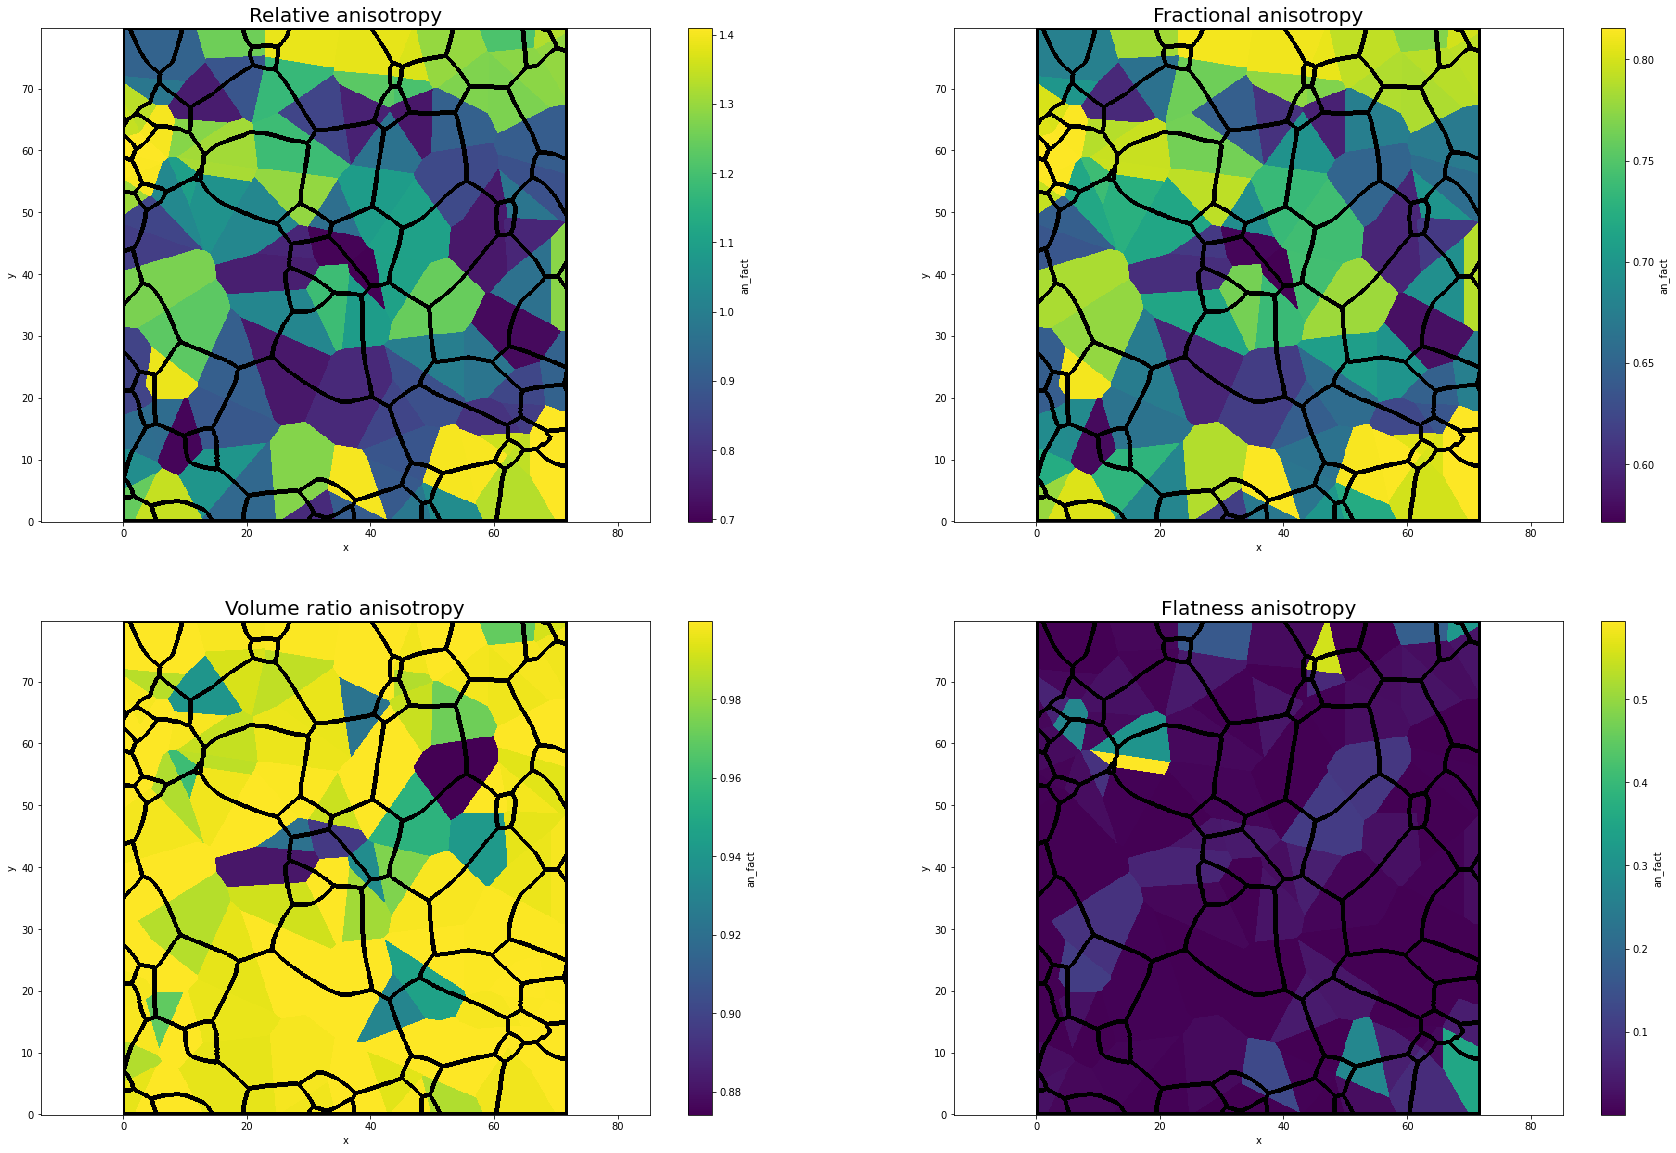

In [19]:
plt.figure(figsize=(30,20))
plt.subplot(221)
ds_CI02.an_fact[:,:,0].plot()
ds_CI02.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Relative anisotropy',fontsize = 20)
plt.subplot(222)
ds_CI02.an_fact[:,:,1].plot()
ds_CI02.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Fractional anisotropy',fontsize = 20)
plt.subplot(223)
ds_CI02.an_fact[:,:,2].plot()
ds_CI02.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Volume ratio anisotropy',fontsize = 20)
plt.subplot(224)
ds_CI02.an_fact[:,:,3].plot()
ds_CI02.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Flatness anisotropy',fontsize = 20)
plt.show()

----------------------------
## CI04

In [8]:
dist2TJ = ds_CI04.aita.dist2TJ_labels()
CI04['dist2TJ'] = dist2TJ

an_factor = ds_CI04.aita.anisotropy_factors()
CI04['relativ_an'] = an_factor[:,:,0]
CI04['fractional_an'] = an_factor[:,:,1]
CI04['volratio_an'] = an_factor[:,:,2]
CI04['flatness_an'] = an_factor[:,:,3]

----------------------------
## CI06

In [9]:
dist2TJ = ds_CI06.aita.dist2TJ_labels()
CI06['dist2TJ'] = dist2TJ

an_factor = ds_CI06.aita.anisotropy_factors()
CI06['relativ_an'] = an_factor[:,:,0]
CI06['fractional_an'] = an_factor[:,:,1]
CI06['volratio_an'] = an_factor[:,:,2]
CI06['flatness_an'] = an_factor[:,:,3]

----------------------------
## CI09

In [10]:
dist2TJ = ds_CI09.aita.dist2TJ_labels()
CI09['dist2TJ'] = dist2TJ

an_factor = ds_CI09.aita.anisotropy_factors()
CI09['relativ_an'] = an_factor[:,:,0]
CI09['fractional_an'] = an_factor[:,:,1]
CI09['volratio_an'] = an_factor[:,:,2]
CI09['flatness_an'] = an_factor[:,:,3]

----------------------------
## CI21

In [11]:
dist2TJ = ds_CI21.aita.dist2TJ_labels()
CI21['dist2TJ'] = dist2TJ

an_factor = ds_CI21.aita.anisotropy_factors()
CI21['relativ_an'] = an_factor[:,:,0]
CI21['fractional_an'] = an_factor[:,:,1]
CI21['volratio_an'] = an_factor[:,:,2]
CI21['flatness_an'] = an_factor[:,:,3]

--------------------
## Save new data

In [12]:
manip = [CI02,CI04,CI06,CI09,CI21]

In [16]:
# for dsML in manip:
#     name = dsML.name
#     ll=len(dsML.keys())
#     name_ll=list(dsML.keys())

#     for i in range(ll):
#         if i==0:
#             data=np.float64(np.array(dsML[name_ll[i]]))
#         else:
#             t2=np.float64(np.array(dsML[name_ll[i]]))
#             data=np.dstack((data,t2))

#     np.save(file='../data/for_learning_plus/' + name,arr=data)